In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px

In [ ]:
df = pd.read_csv("cleaned_df.csv")

In [ ]:
df.head()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64','Float64'])


In [ ]:
fig = plt.figure(figsize=(15, 15))

sns.heatmap(numerical_columns.corr(),annot=True, linewidths=0.05)

In [ ]:
numerical_columns.corr(df["G3"])

- There exists multicolinearity between Medu and Fedu so we will drop one of them
- There exists multicolinearity between Malc and Dalc so we will drop one of them

In [ ]:
df.drop(columns=["Walc","Fedu"],inplace =True)

In [ ]:
categorical_columns = [c for c  in df.columns if c not in numerical_columns]
categorical_columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_df = ordinal_encoder.fit_transform(df[categorical_columns])
fig = plt.figure(figsize=(20, 20))

ordinal_encoded_df = pd.DataFrame(ordinal_encoded_df,columns=categorical_columns)
ordinal_encoded_df["G3"] = df["G3"]
sns.heatmap(ordinal_encoded_df.corr(),annot=True, linewidths=0.05)


There is no multi colinearity and no high correlation between any of the categorical features and our target

# Here We begin with hypothesis testing   

## First define our hypothesis and get a general function for hypothesis test

1-Null Hypothesis(H0): the two categories in binary columns  in our dataset have the same performance regarding average grades
2-Alternative Hypothesis(H1): the  two categories in binary columns in our dataset have different perfromance regarding Final average

Here we choose binary categorical columns


In [ ]:
binary_categorical_columns=[c for c in categorical_columns if len(df[c].unique()) == 2] #here we choose colmns that have only 2 values(categories)

In [ ]:
from scipy import stats


def hypothesis_test(column):  # we give this function a binary categorical columns and we do hypothesis test on its two categories to see whether their average final grade will differ
    cat1 = df[column].unique()[0]
    cat2 = df[column].unique()[1]
    
    df1 = df[df[column] == cat1]
    df2 = df[df[column] == cat2]
    
    X0 = np.mean(df1["G3"])
    X1 = np.mean(df2["G3"])
    X_bar = X0 - X1
    
    Sigma1 = np.std(df1["G3"])
    Sigma2 = np.std(df2["G3"])
    
    Sig_1 = (Sigma1**2)/len(df1)
    Sig_2 = (Sigma2**2)/len(df2)
    SE = np.sqrt(Sig_1+Sig_2)
    
    Z_score = X_bar/SE  # we use Z_score because n>30
    p_value = 2 * stats.norm.cdf(-abs(Z_score))
    alpha = 0.05

    if p_value < alpha:
        print(f"Reject the null hypothesis. The means are significantly different (p-value = {p_value:.04f})")
        return True
    else:
        print(f"Fail to reject the null hypothesis. The means are not significantly different (p-value = {p_value:.04f})")
        return False


In [ ]:
Rejected = []
non_rejected = []

for column in binary_categorical_columns:
    print("Hypothesis test for column : ", column)
    if (hypothesis_test(column)):
        Rejected.append(column)
    else:
        non_rejected.append(column)
    print("-----------------------------------------------------")


In [ ]:
print("Categories that differ from one another (affect our data): ")
print(Rejected)
print("Categories that do not differ alot from one another( not significant enough to know whether it affects or not):")
print(non_rejected)


Reject the null hypothesis. The means are significantly different (p-value = 0.0353)


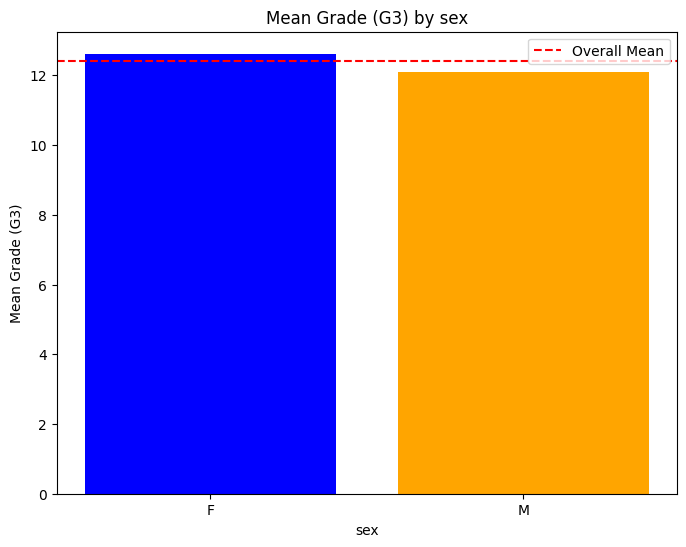

Hypothesis Rejected: True


In [7]:

def hypothesis_test(column):  
    cat1 = df[column].unique()[0]
    cat2 = df[column].unique()[1]
    
    df1 = df[df[column] == cat1]
    df2 = df[df[column] == cat2]
    
    X0 = np.mean(df1["G3"])
    X1 = np.mean(df2["G3"])
    X_bar = X0 - X1
    
    Sigma1 = np.std(df1["G3"])
    Sigma2 = np.std(df2["G3"])
    
    Sig_1 = (Sigma1**2)/len(df1)
    Sig_2 = (Sigma2**2)/len(df2)
    SE = np.sqrt(Sig_1+Sig_2)
    
    Z_score = X_bar/SE  
    p_value = 2 * stats.norm.cdf(-abs(Z_score))
    alpha = 0.05

    if p_value < alpha:
        print(f"Reject the null hypothesis. The means are significantly different (p-value = {p_value:.04f})")
        hypothesis_rejected = True
    else:
        print(f"Fail to reject the null hypothesis. The means are not significantly different (p-value = {p_value:.04f})")
        hypothesis_rejected = False
    
    # Plotting the hypothesis test result
    plt.figure(figsize=(8, 6))
    plt.bar([cat1, cat2], [X0, X1], color=['blue', 'orange'])
    plt.xlabel(column)
    plt.ylabel('Mean Grade (G3)')
    plt.title('Mean Grade (G3) by ' + column)
    plt.xticks([cat1, cat2])
    plt.axhline(np.mean(df["G3"]), color='red', linestyle='--', label='Overall Mean')
    plt.legend()
    plt.show()
    
    return hypothesis_rejected

# Assuming df is defined and contains your dataset
hypothesis_rejected = hypothesis_test("sex")
print("Hypothesis Rejected:", hypothesis_rejected)
